# US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
import datetime

In [3]:
now  = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

In [4]:
xl_writer = pd.ExcelWriter(f"covid19_USA_data_{now}.xlsx")

In [5]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv?_sm_au_=iVVZQ0fSPs48H6VNRMpVsKQtC6Vvq"

In [6]:
df = pd.read_csv(url)

In [7]:
df.to_excel(xl_writer, "raw")

In [8]:
df2 = df[(df["iso2"] == "US") & (~df["Admin2"].isna())].drop(columns=["UID", "iso2", "code3", "iso3", "FIPS", "Admin2", "Country_Region", "Lat", "Long_", "Combined_Key"])

In [9]:
df4 = pd.DataFrame(df2.groupby(by=["Province_State",]).sum().T.to_records()).rename(columns={'index': 'date'})

In [10]:
df4["date"] = pd.to_datetime(df4["date"])

In [11]:
df4["day_of_year"] = df4["date"].dt.dayofyear

In [12]:
df4.set_index(['date', 'day_of_year'], inplace=True)

In [13]:
df4.to_excel(xl_writer, "USA")

In [14]:
summary = df4.max()

In [15]:
summary.sort_values(ascending=False, inplace=True)

In [16]:
summary.to_excel(xl_writer, "Summary")

In [17]:
xl_writer.close()

In [18]:
def plot_data(dataframe, logx=False, logy=False, **kwargs):
    if logx:
        df = dataframe.reset_index(level=0, drop=True)
        return df.plot(logx=logx, logy=logy, **kwargs)
    else:
        df = dataframe.reset_index(level=1, drop=True)
        return df.plot(logy=logy, **kwargs) 

In [19]:
def plot_state(dataframe, state="California", exp=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
    if isinstance(state, (list, tuple)):
        pass
    else:
        fig.suptitle(state)
    #
    plot1 = plot_data(dataframe[state], ax=ax1)
    if exp:
        plot2 = plot_data(dataframe[state], logy=True, logx=False, ax=ax2)
    else:
        plot2 = plot_data(dataframe[state], logy=True, logx=False, ax=ax2)
    

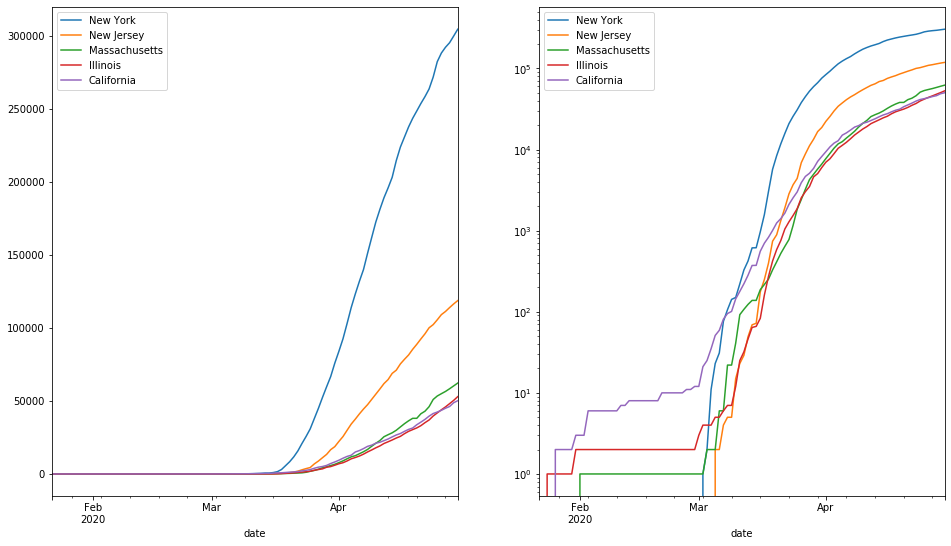

In [20]:
plot_state(df4, state=list(summary.index[:5]))

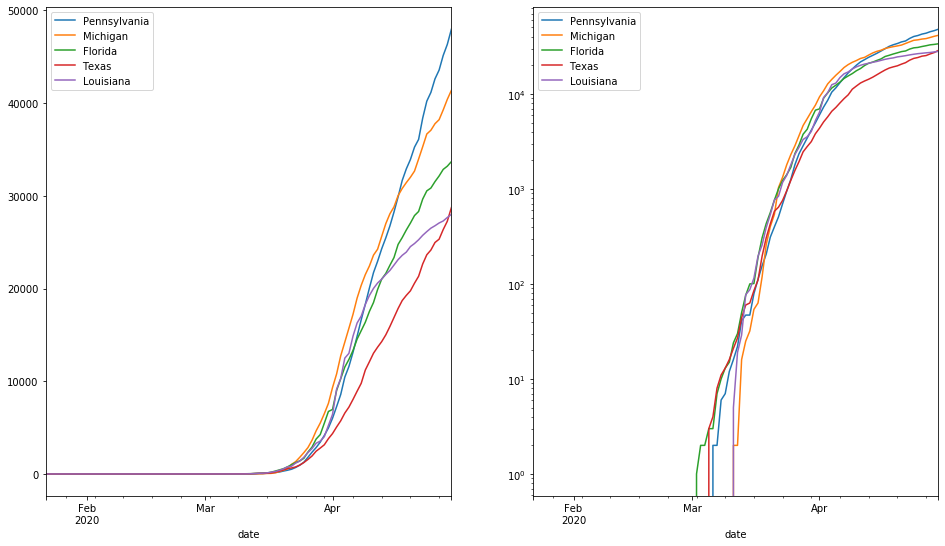

In [21]:
plot_state(df4, state=list(summary.index[5:10]))

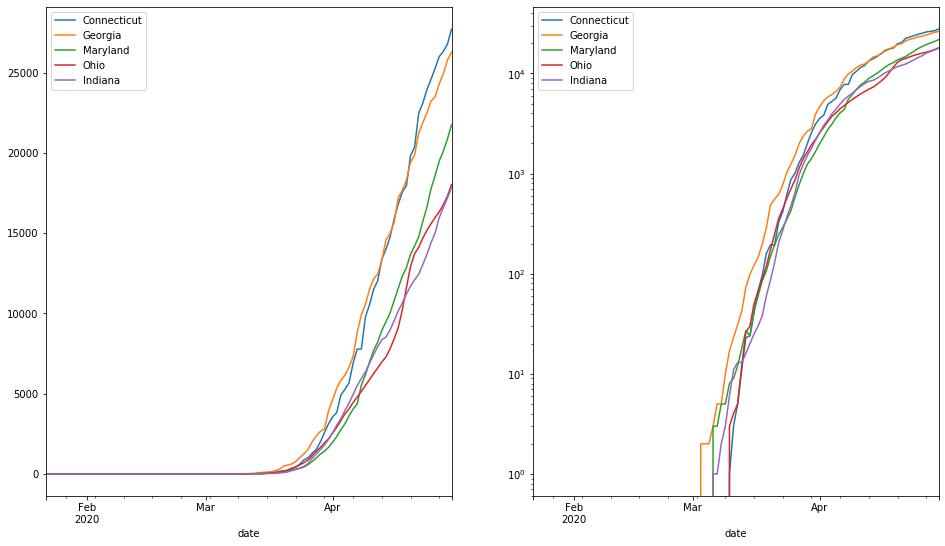

In [22]:
plot_state(df4, state=list(summary.index[10:15]))

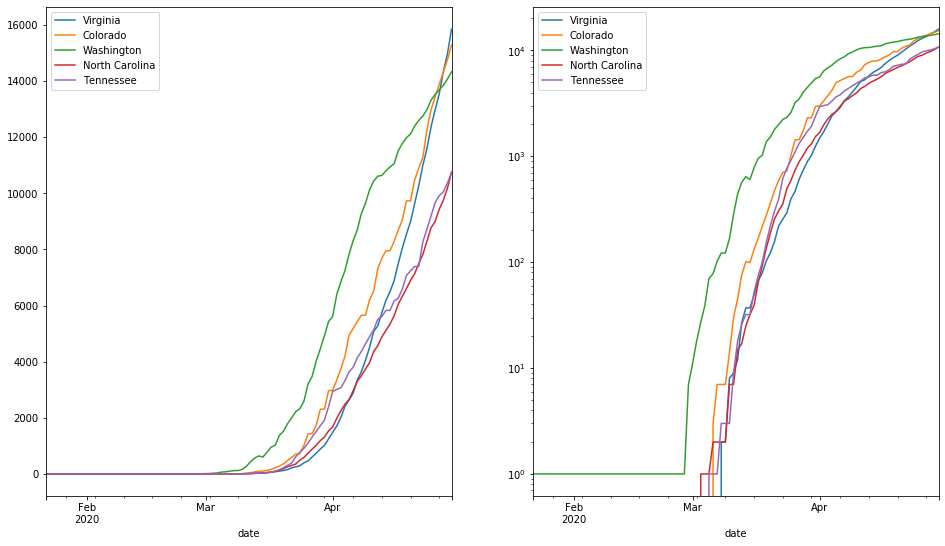

In [23]:
plot_state(df4, state=list(summary.index[15:20]))

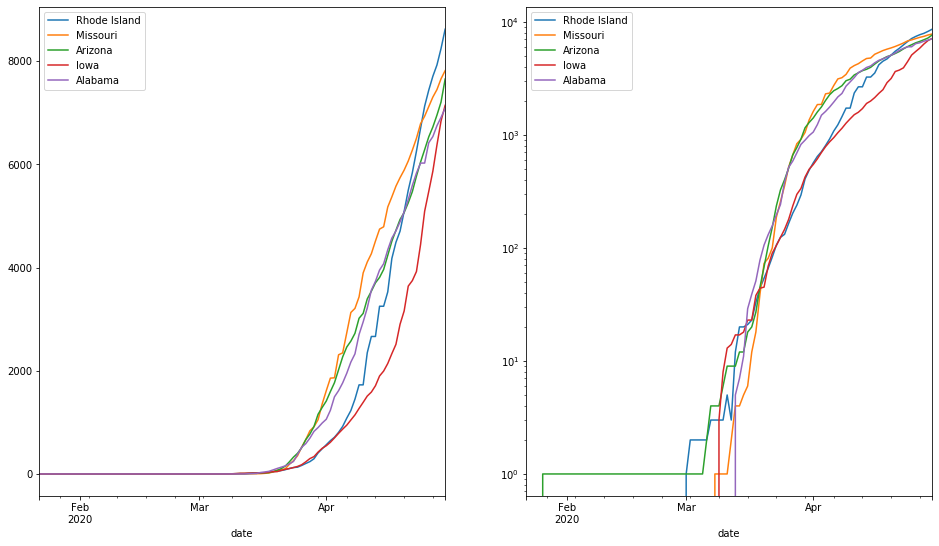

In [24]:
plot_state(df4, state=list(summary.index[20:25]))

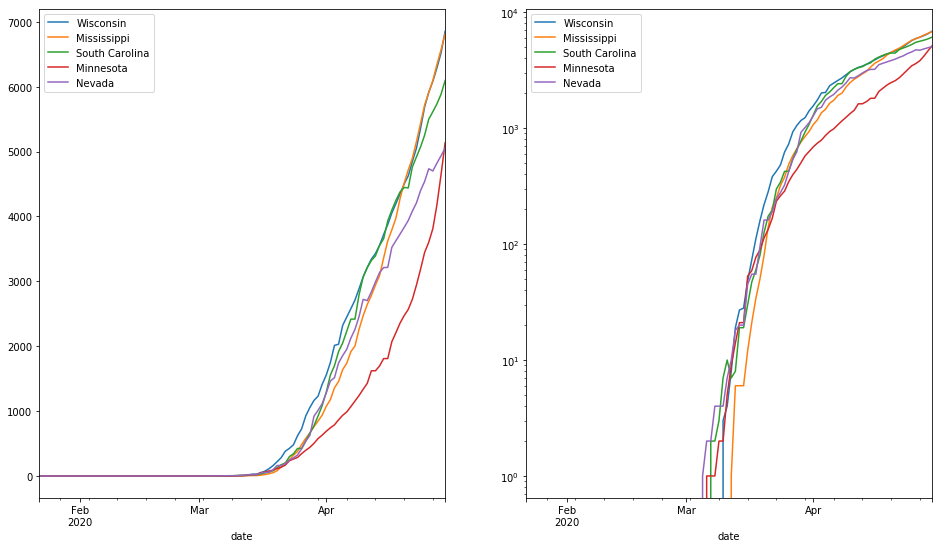

In [25]:
plot_state(df4, state=list(summary.index[25:30]))

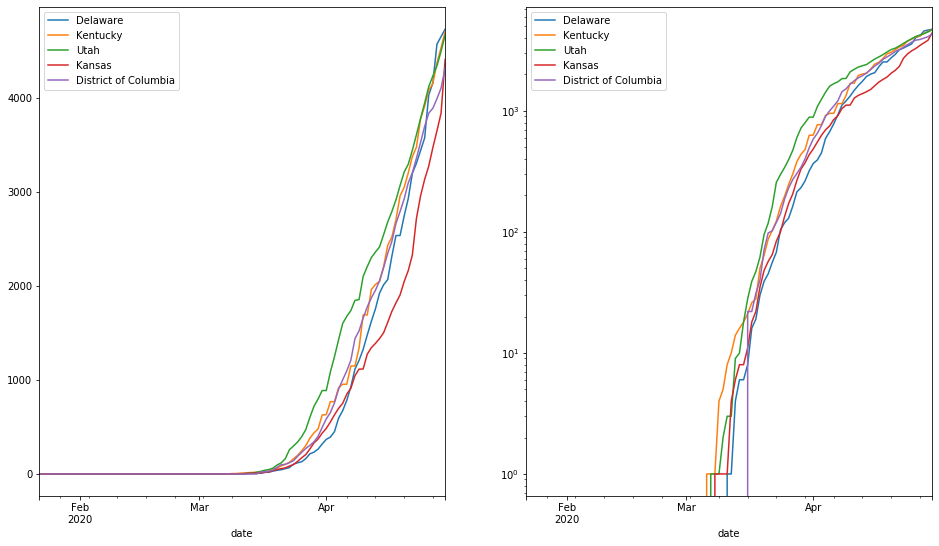

In [26]:
plot_state(df4, state=list(summary.index[30:35]))

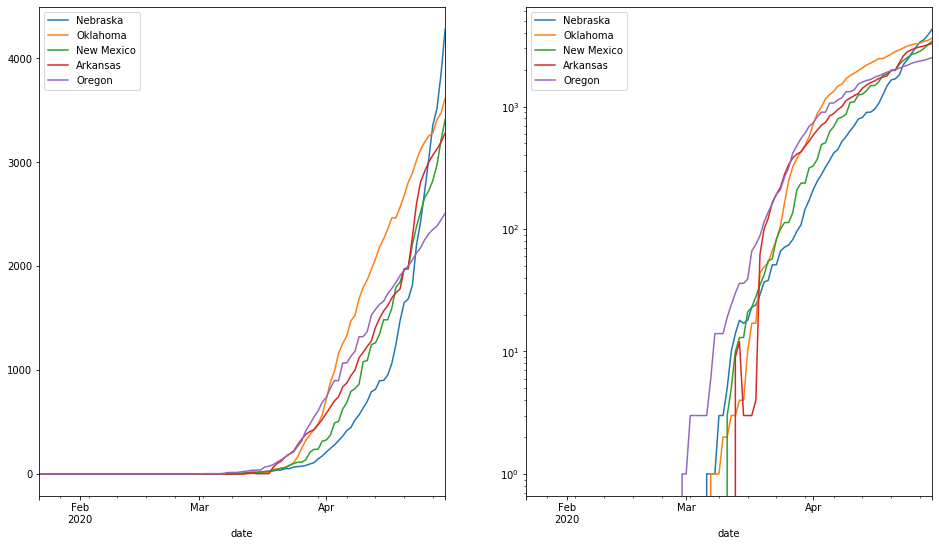

In [27]:
plot_state(df4, state=list(summary.index[35:40]))

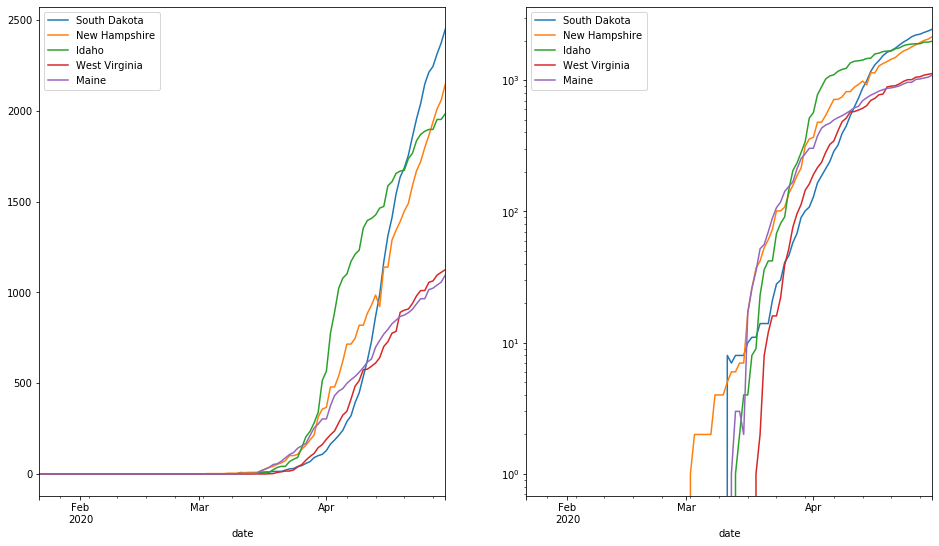

In [28]:
plot_state(df4, state=list(summary.index[40:45]))

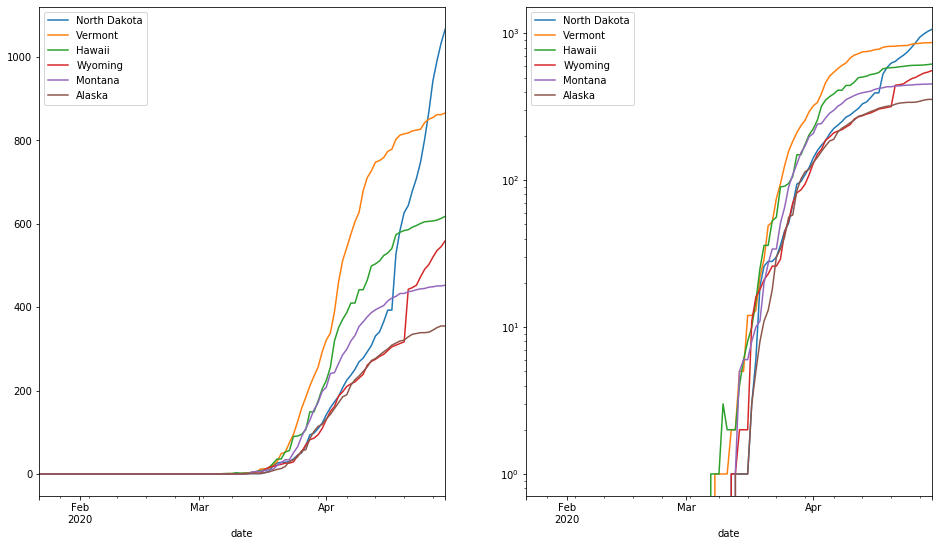

In [29]:
plot_state(df4, state=list(summary.index[45:]))

In [70]:
def plot_daily(dataframe, state):
    data = dataframe.loc[dataframe[state] >0, state].to_frame()
    data.columns = ["cases"]
    data["daily cases"] = data["cases"].diff()
    data.loc[data["daily cases"].isna(), "daily cases"] = 0
    data["daily_smooth"] = signal.savgol_filter(data["daily cases"], 11, 3)
    # data.reset_index("day", drop=True, inplace=True)
    data.reset_index("day_of_year", drop=True, inplace=True)
    data["cases"].plot(figsize=(16, 9), color="r", title=f"Cases in {state}", legend=True, label="Cumulative")
    data["daily cases"].plot(secondary_y=True, color="y", rot=0, legend=True, label="Daily")  
    data["daily_smooth"].plot(secondary_y=True, color="b", rot=0, legend=True, label="Daily 2")  

In [88]:
for c in summary.index[:30]:
    print(f"plot_daily(df4, '{c}')")

plot_daily(df4, 'New York')
plot_daily(df4, 'New Jersey')
plot_daily(df4, 'Massachusetts')
plot_daily(df4, 'Illinois')
plot_daily(df4, 'California')
plot_daily(df4, 'Pennsylvania')
plot_daily(df4, 'Michigan')
plot_daily(df4, 'Florida')
plot_daily(df4, 'Texas')
plot_daily(df4, 'Louisiana')
plot_daily(df4, 'Connecticut')
plot_daily(df4, 'Georgia')
plot_daily(df4, 'Maryland')
plot_daily(df4, 'Ohio')
plot_daily(df4, 'Indiana')
plot_daily(df4, 'Virginia')
plot_daily(df4, 'Colorado')
plot_daily(df4, 'Washington')
plot_daily(df4, 'North Carolina')
plot_daily(df4, 'Tennessee')
plot_daily(df4, 'Rhode Island')
plot_daily(df4, 'Missouri')
plot_daily(df4, 'Arizona')
plot_daily(df4, 'Iowa')
plot_daily(df4, 'Alabama')
plot_daily(df4, 'Wisconsin')
plot_daily(df4, 'Mississippi')
plot_daily(df4, 'South Carolina')
plot_daily(df4, 'Minnesota')
plot_daily(df4, 'Nevada')


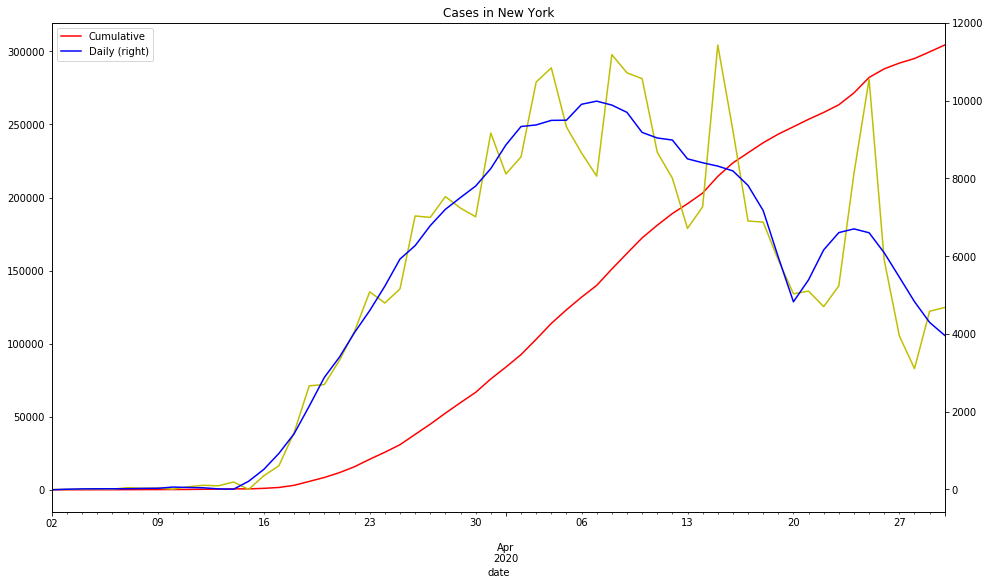

In [72]:
plot_daily(df4, 'New York')

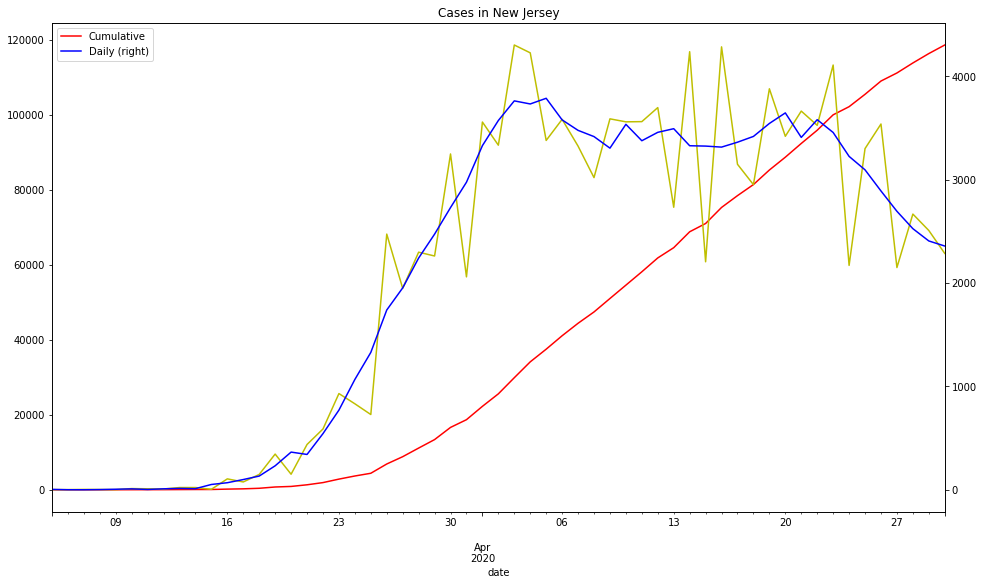

In [73]:
plot_daily(df4, 'New Jersey')

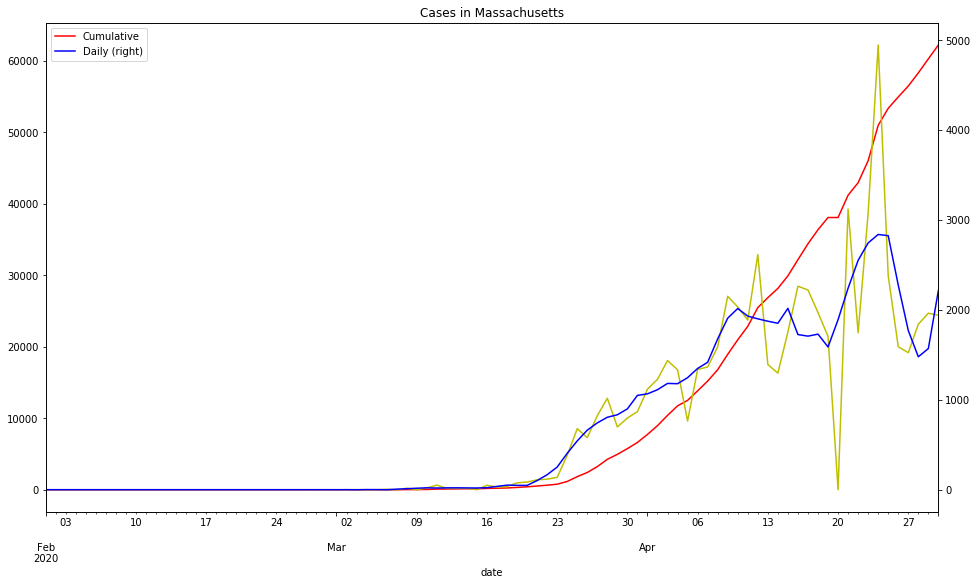

In [74]:
plot_daily(df4, 'Massachusetts')

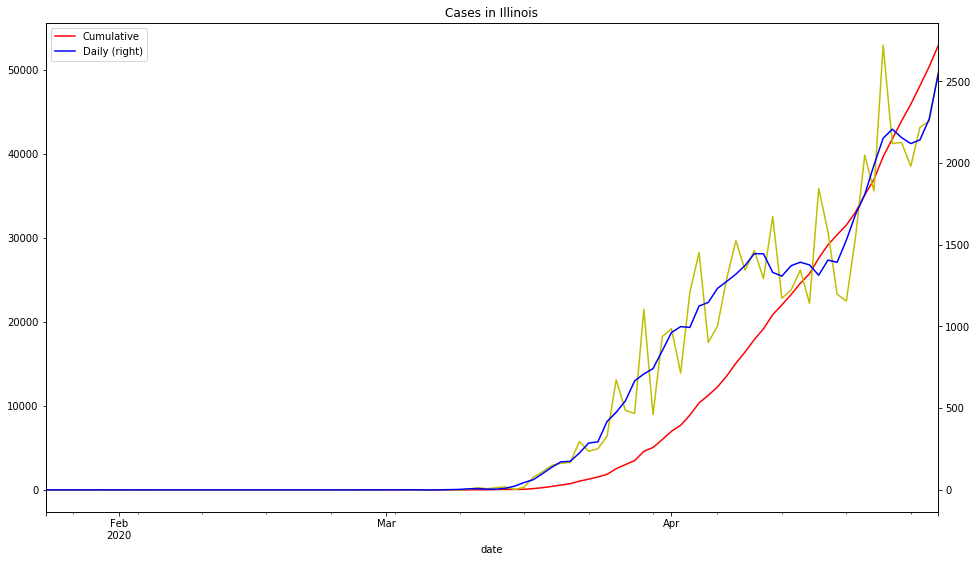

In [53]:
plot_daily(df4, 'Illinois')

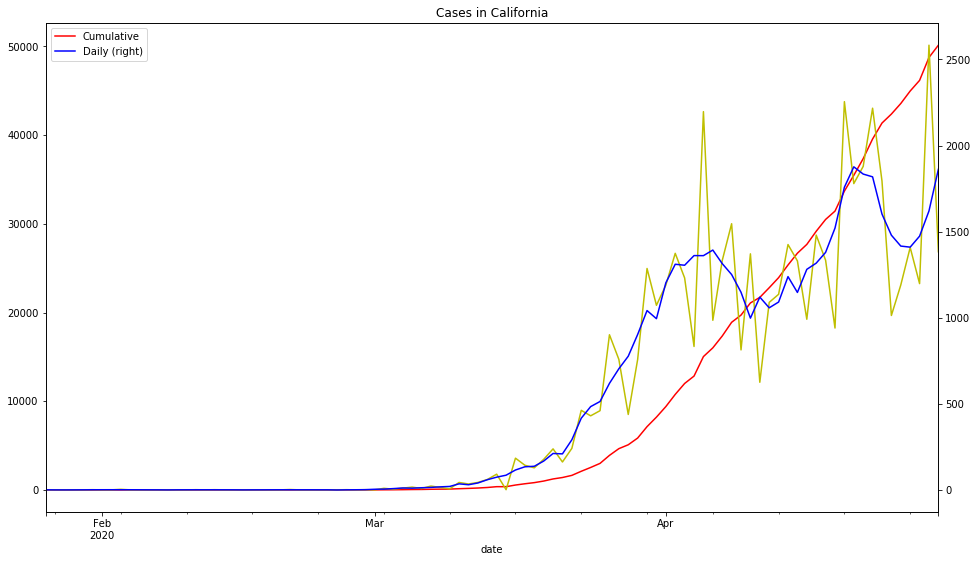

In [54]:
plot_daily(df4, 'California')

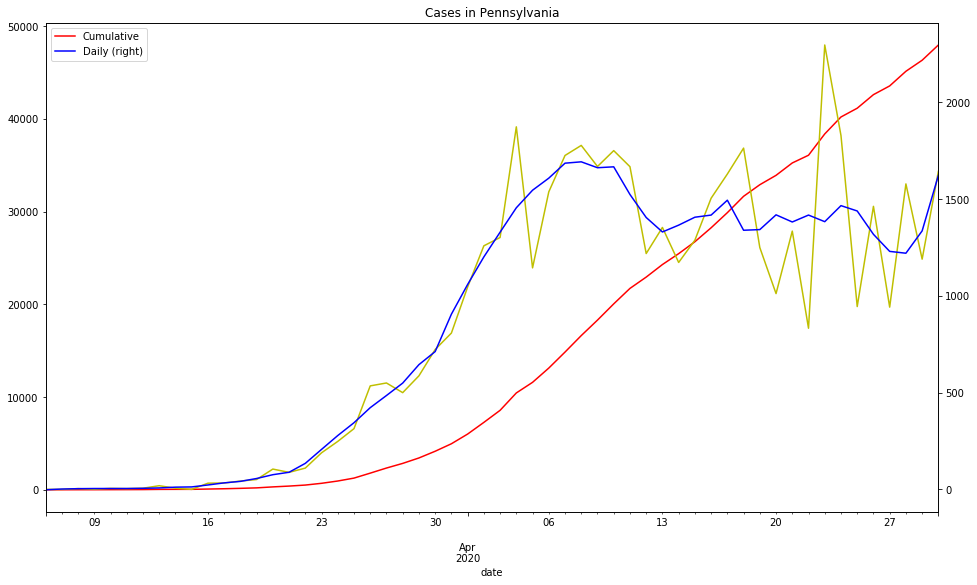

In [55]:
plot_daily(df4, 'Pennsylvania')

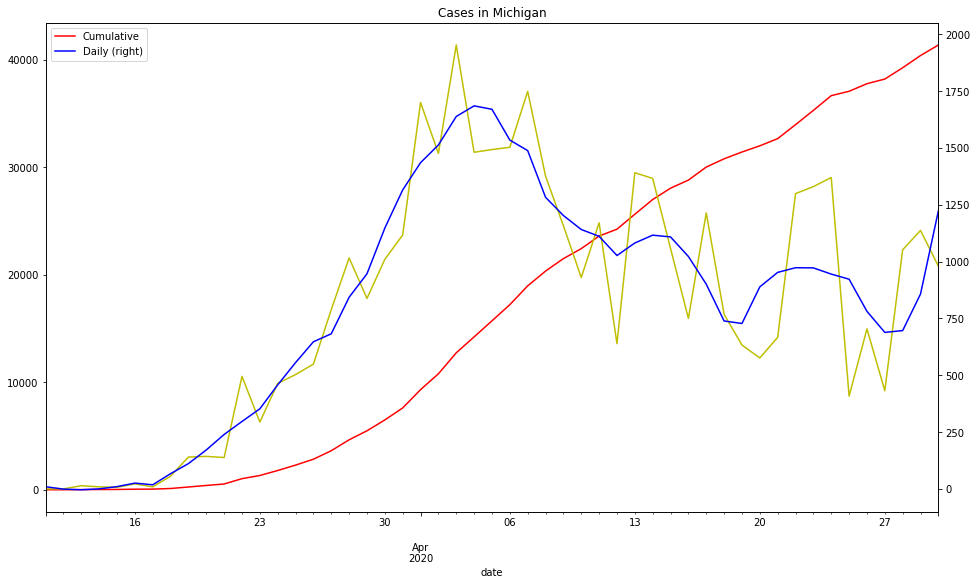

In [56]:
plot_daily(df4, 'Michigan')

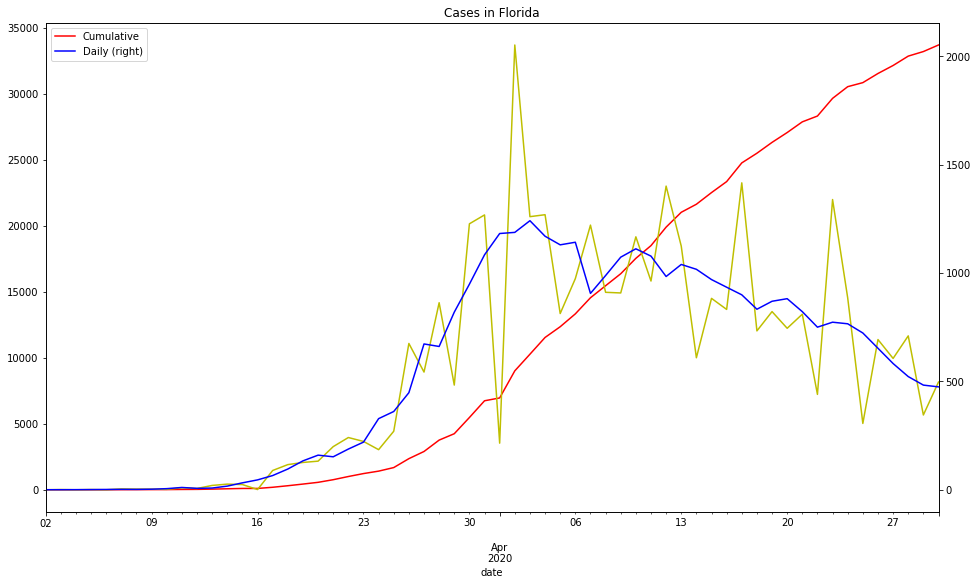

In [57]:
plot_daily(df4, 'Florida')

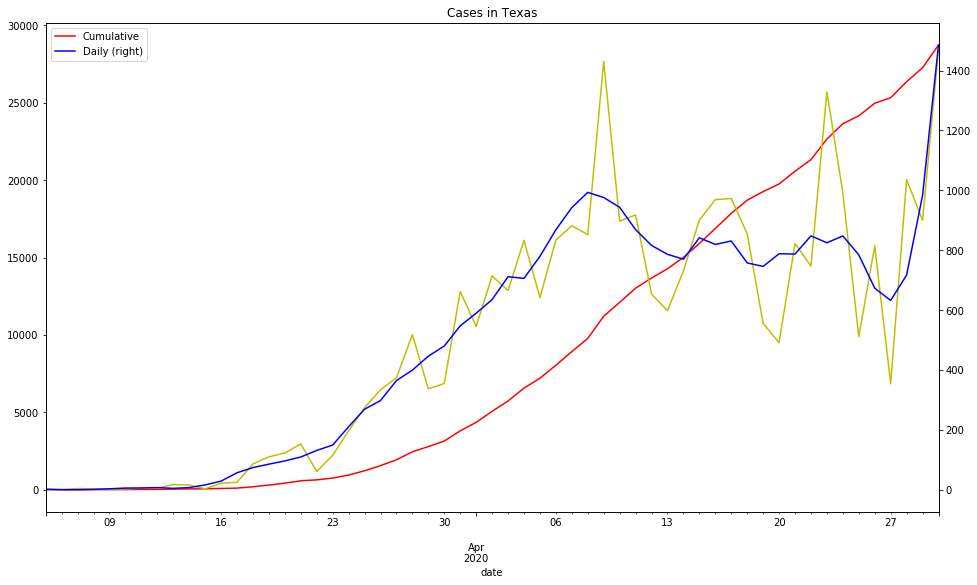

In [58]:
plot_daily(df4, 'Texas')

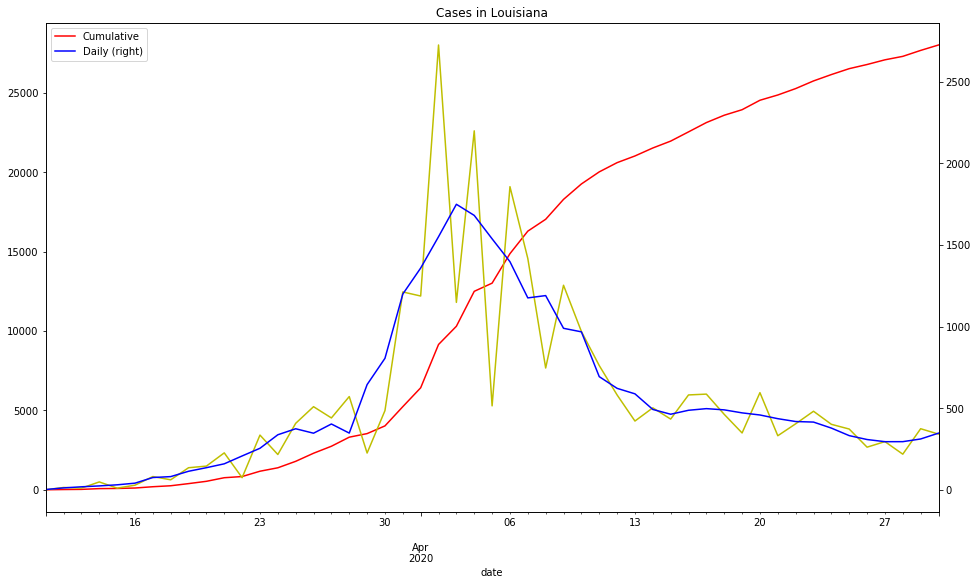

In [59]:
plot_daily(df4, 'Louisiana')

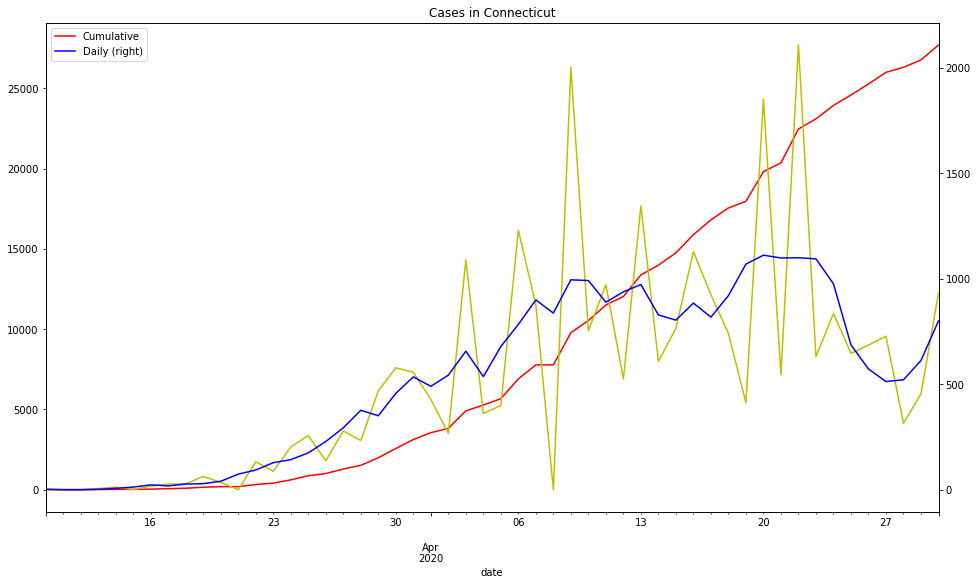

In [60]:
plot_daily(df4, 'Connecticut')

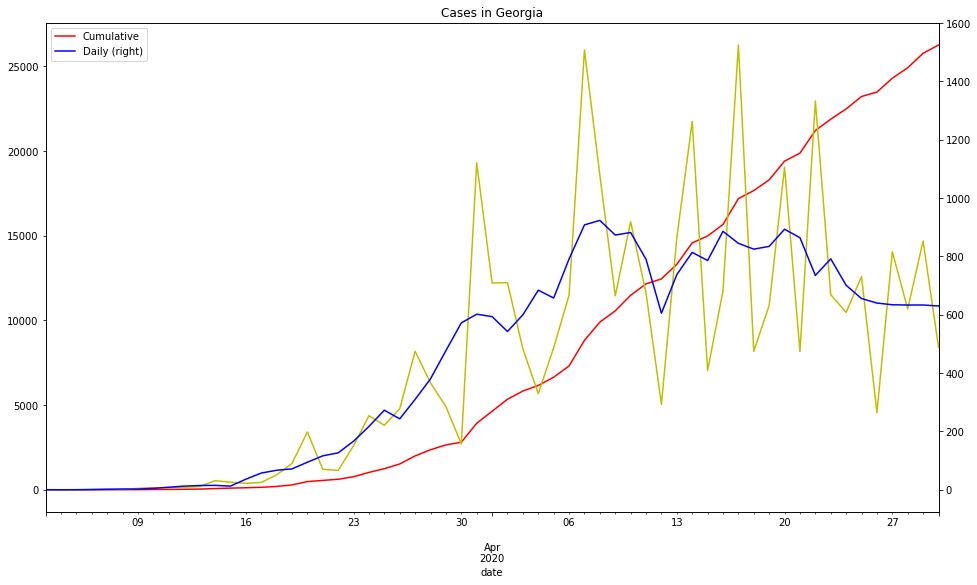

In [61]:
plot_daily(df4, 'Georgia')

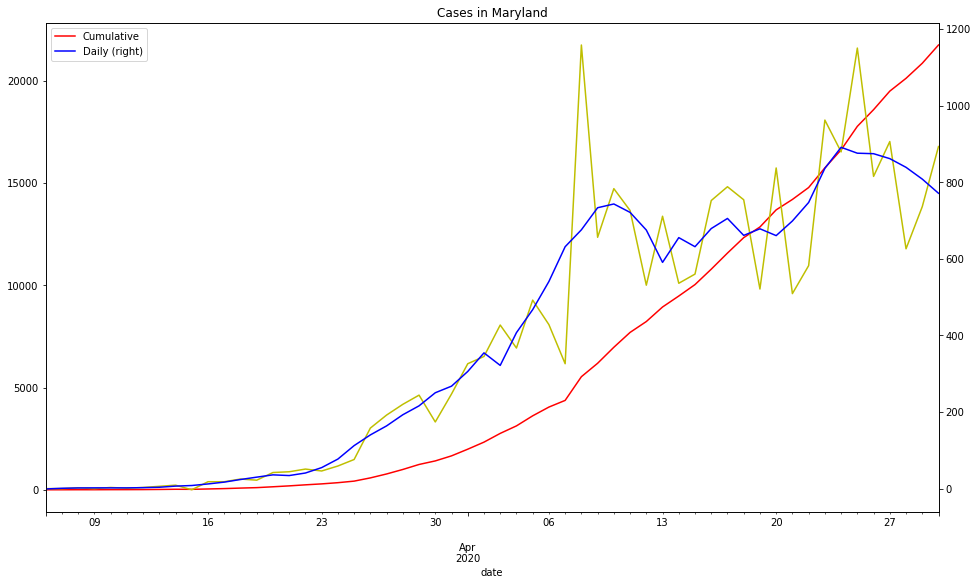

In [62]:
plot_daily(df4, 'Maryland')

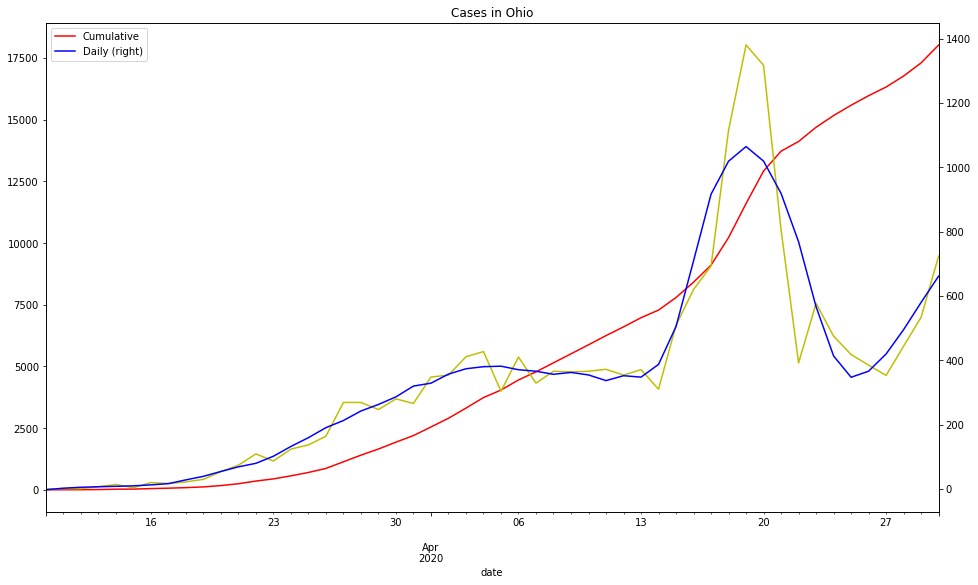

In [63]:
plot_daily(df4, 'Ohio')

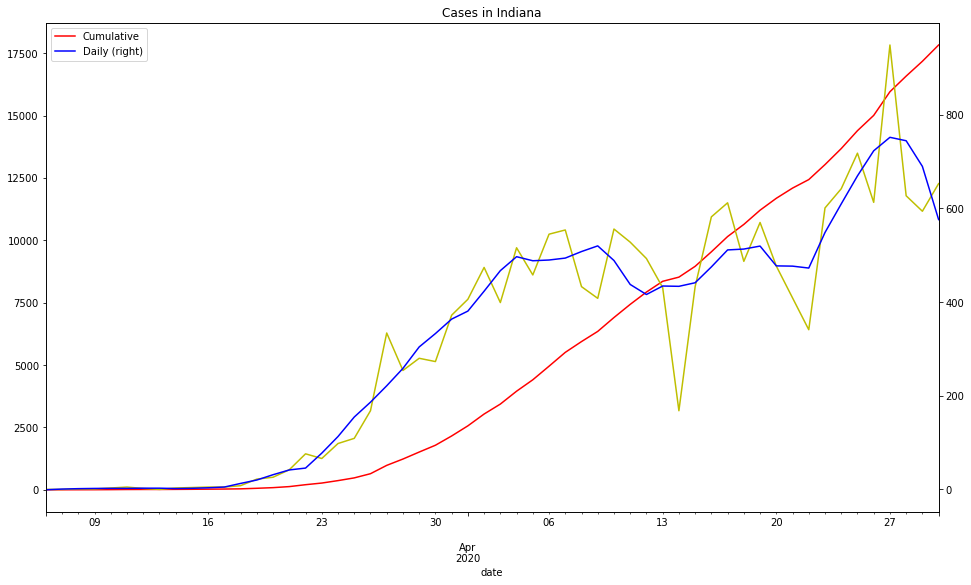

In [64]:
plot_daily(df4, 'Indiana')

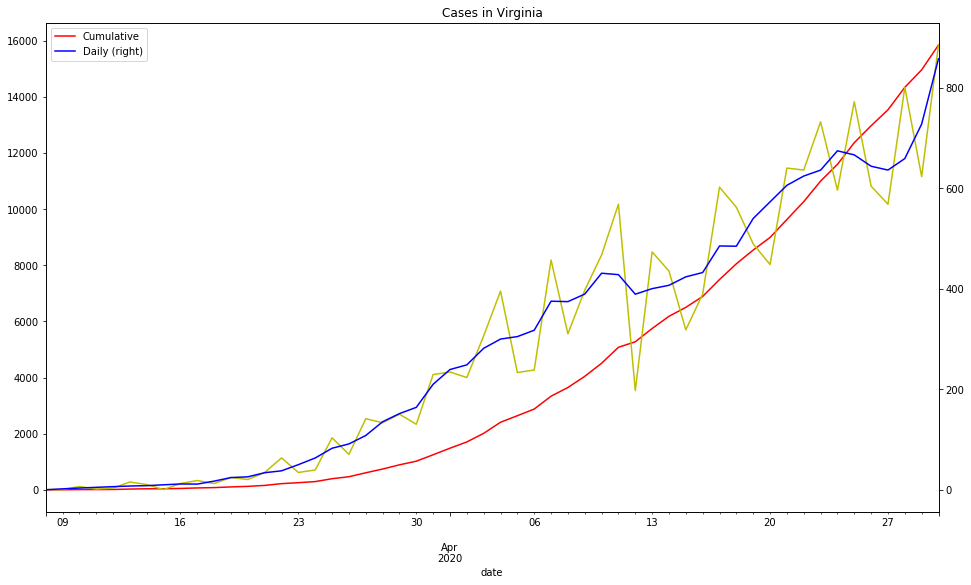

In [76]:
plot_daily(df4, 'Virginia')

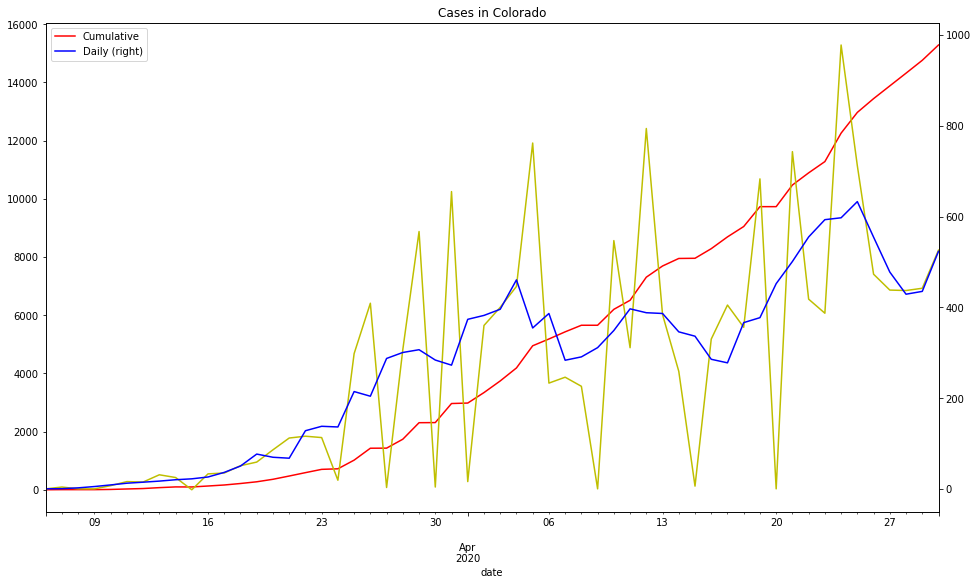

In [77]:
plot_daily(df4, 'Colorado')

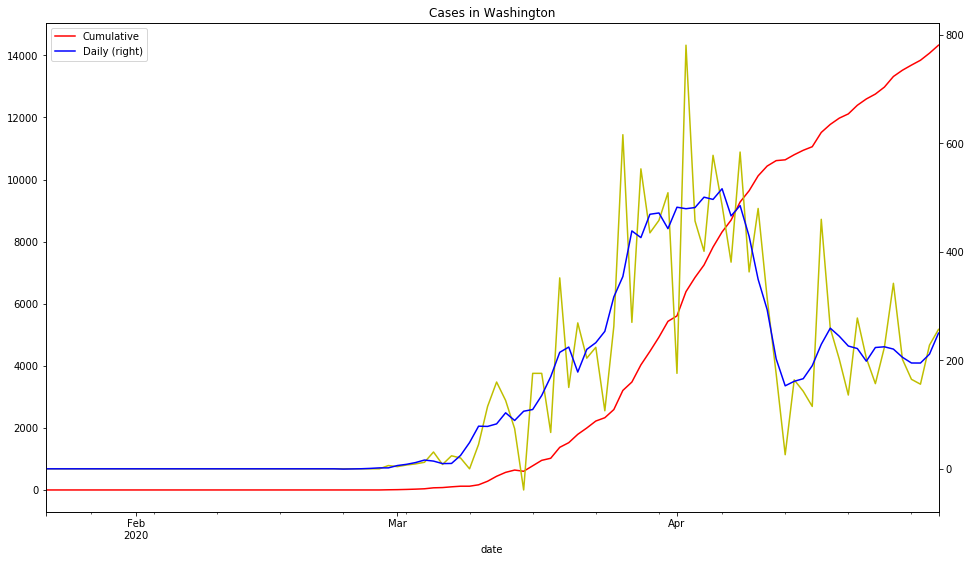

In [78]:
plot_daily(df4, 'Washington')

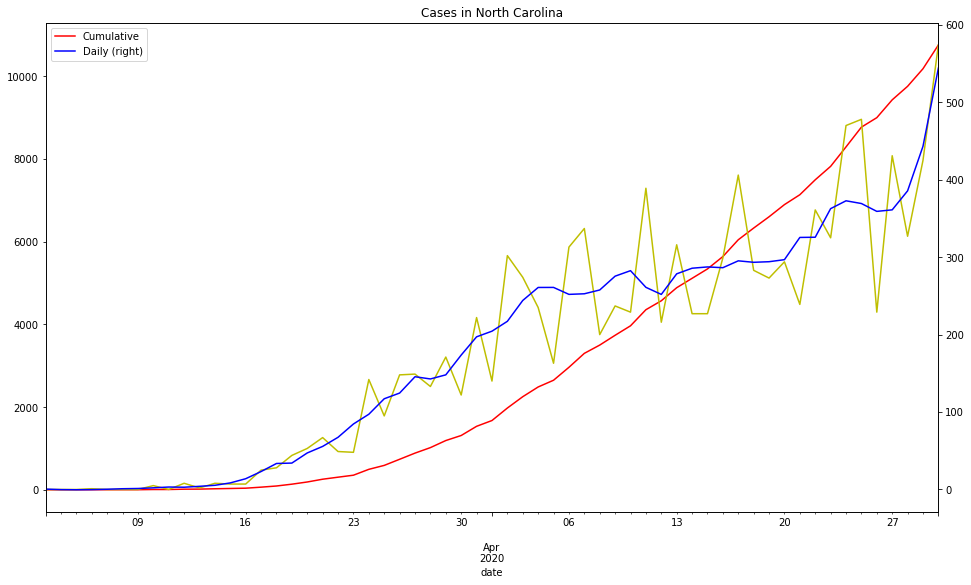

In [79]:
plot_daily(df4, 'North Carolina')

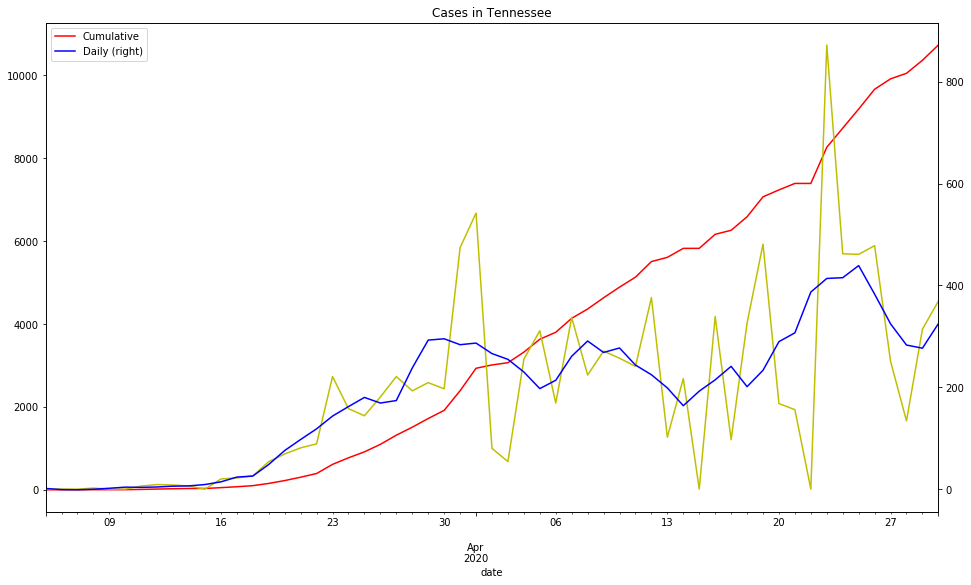

In [80]:
plot_daily(df4, 'Tennessee')

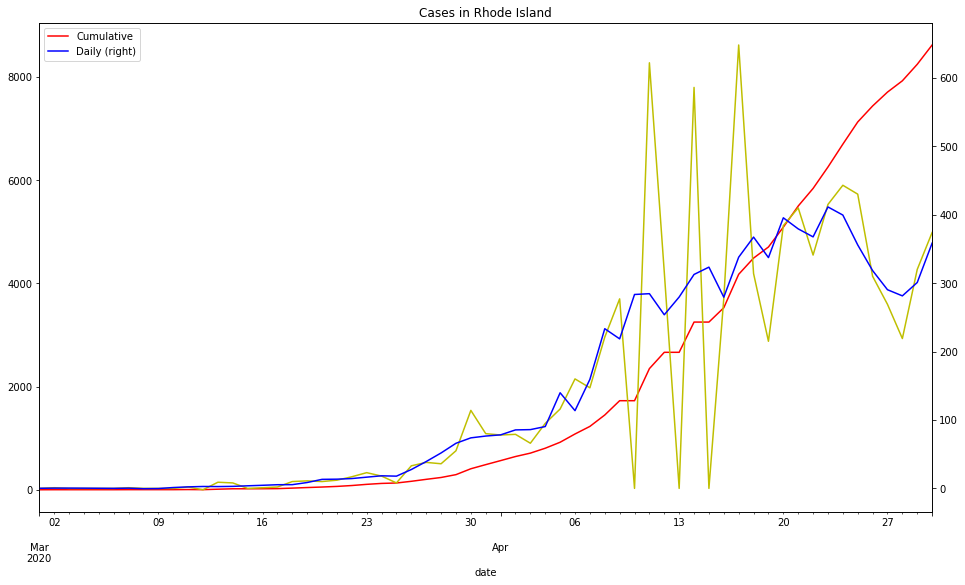

In [82]:
plot_daily(df4, 'Rhode Island')

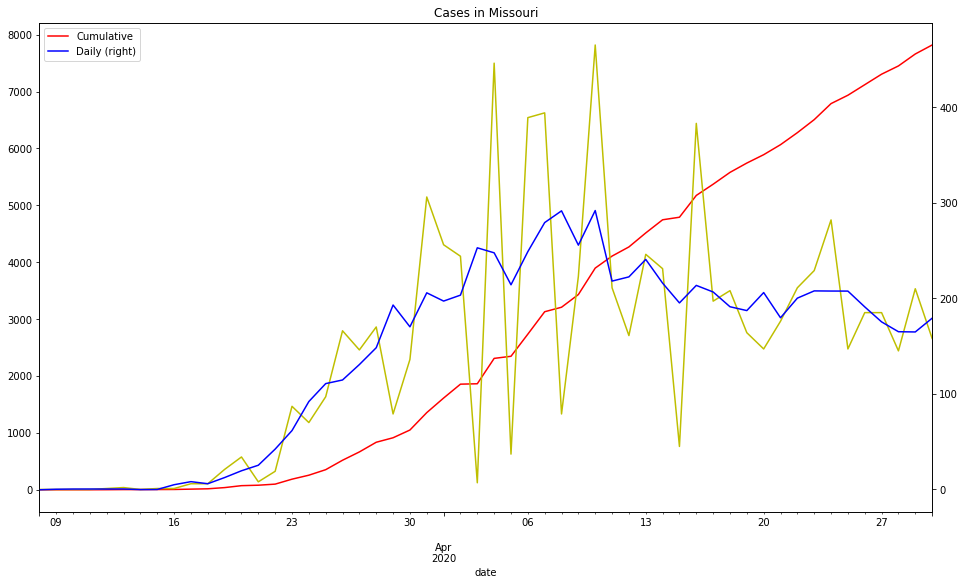

In [83]:
plot_daily(df4, 'Missouri')

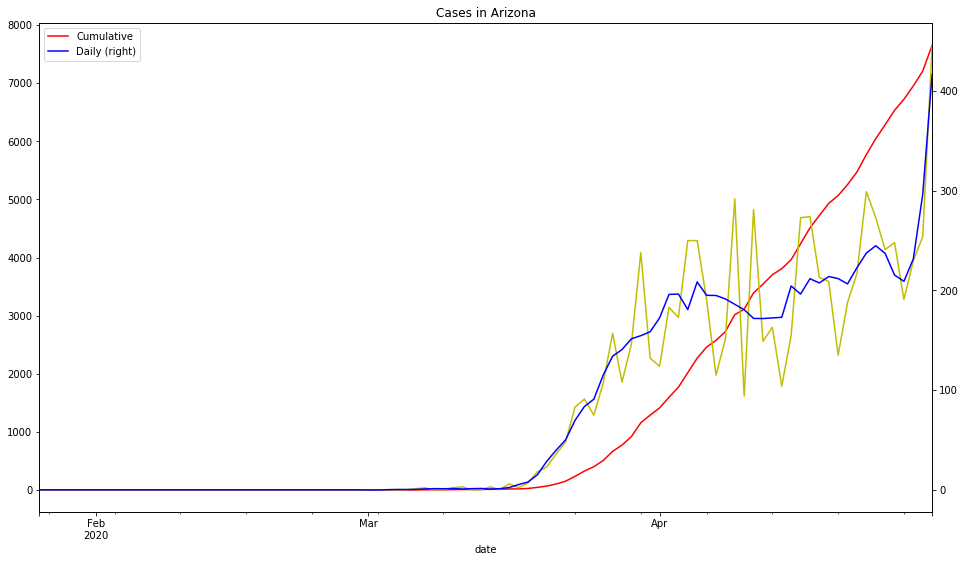

In [84]:
plot_daily(df4, 'Arizona')

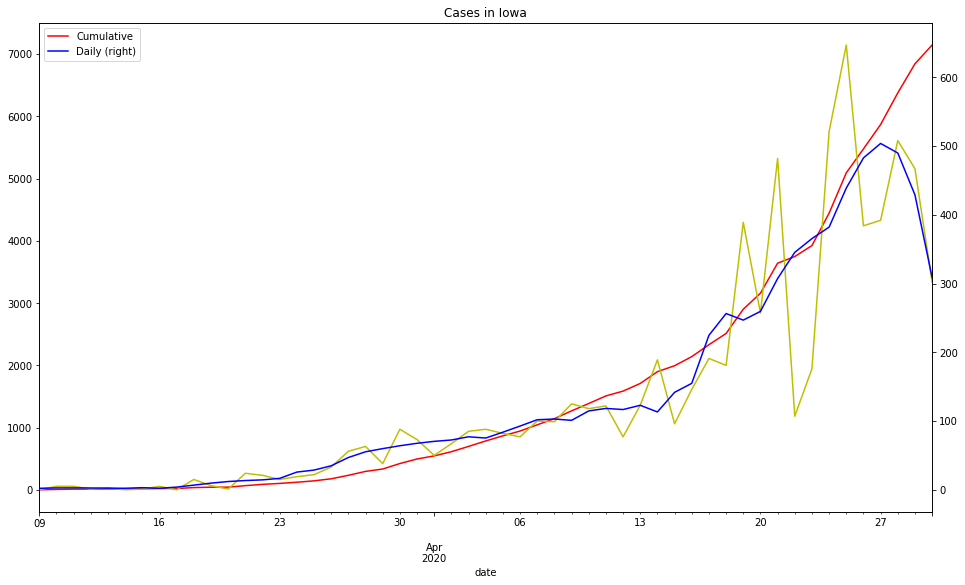

In [85]:
plot_daily(df4, 'Iowa')

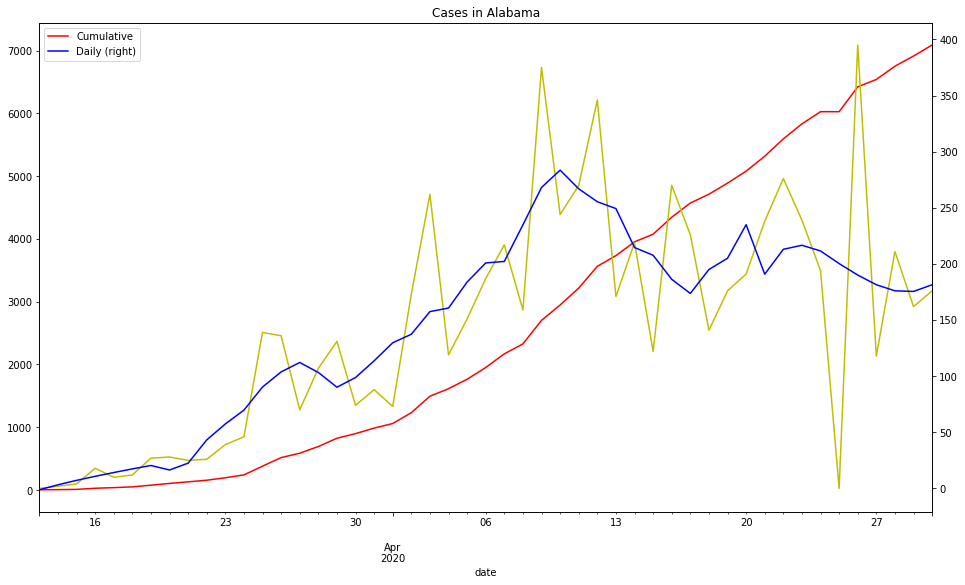

In [86]:
plot_daily(df4, 'Alabama')

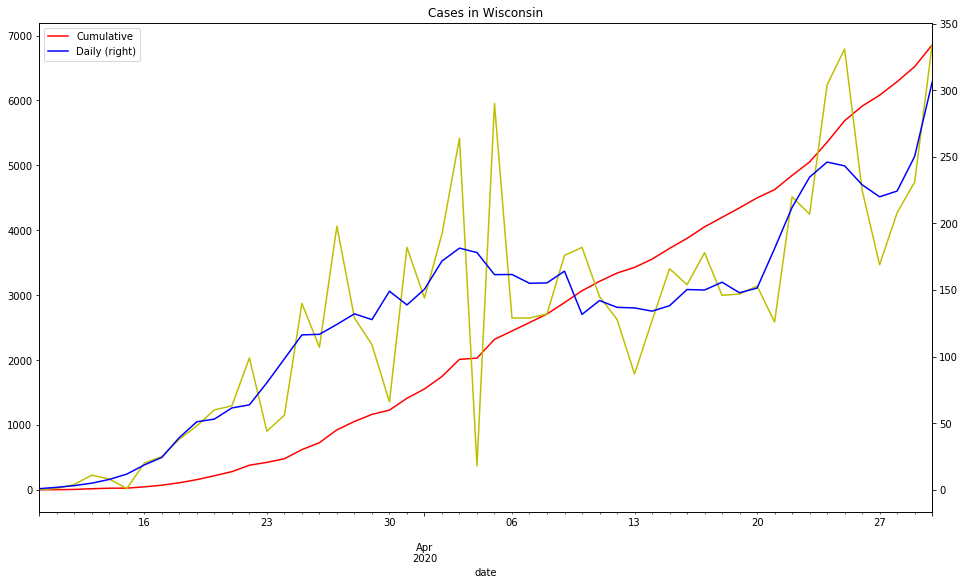

In [89]:
plot_daily(df4, 'Wisconsin')

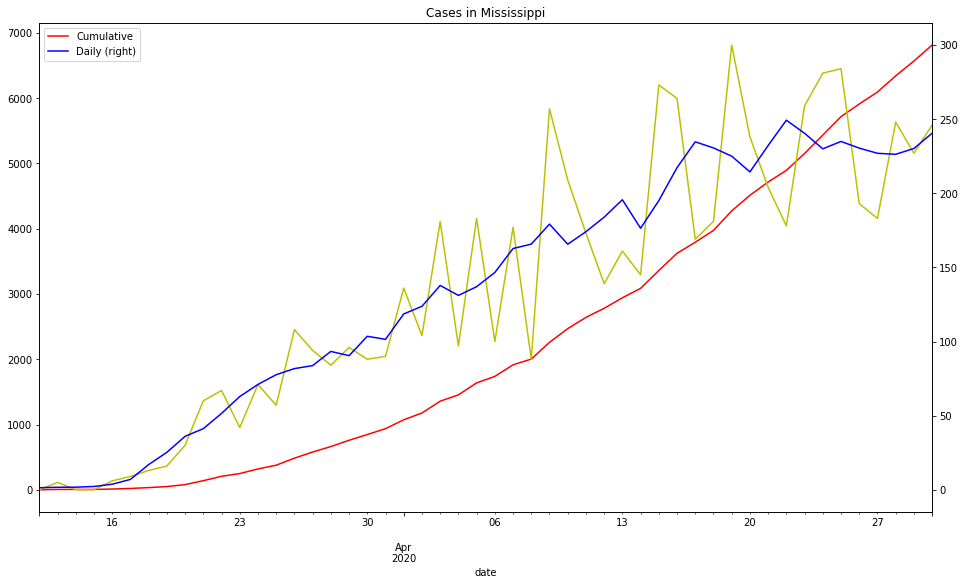

In [90]:
plot_daily(df4, 'Mississippi')

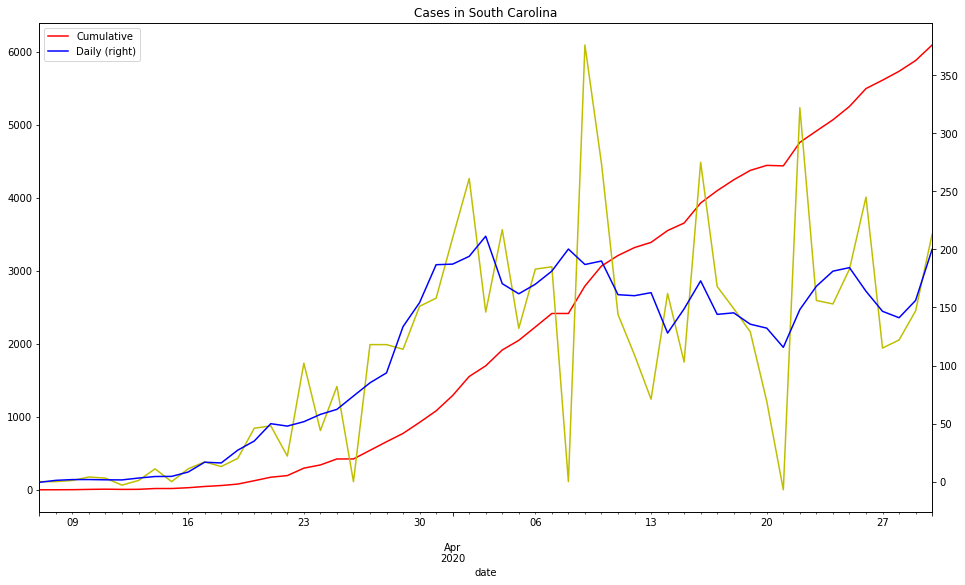

In [91]:
plot_daily(df4, 'South Carolina')

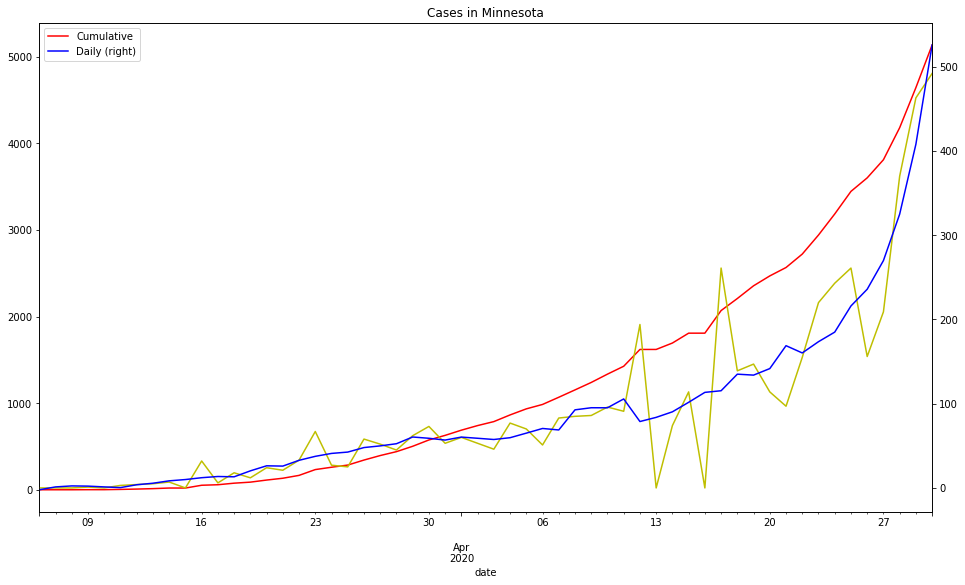

In [92]:
plot_daily(df4, 'Minnesota')

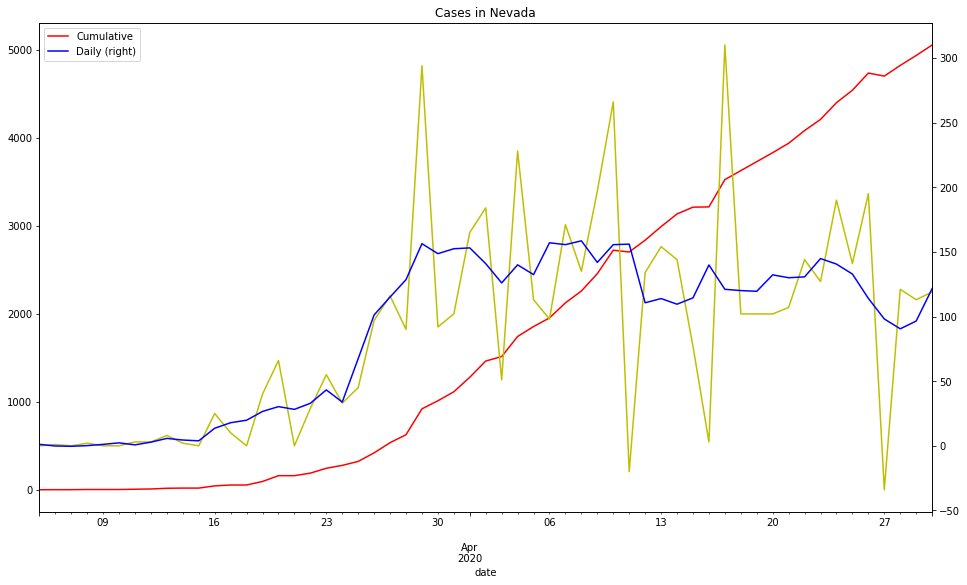

In [93]:
plot_daily(df4, 'Nevada')